In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import numpy as np
from keras import Sequential
import matplotlib.pyplot as plt
from keras import optimizers
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential,Model
from keras.layers import LSTM, Dense,Activation, Bidirectional, Input,Dropout,BatchNormalization,CuDNNLSTM, GRU, CuDNNGRU, Embedding, GlobalMaxPooling1D, GlobalAveragePooling1D, Flatten
from keras import backend as K
from keras.engine.topology import Layer
from keras import initializers, regularizers, constraints
from sklearn.model_selection import KFold, cross_val_score, train_test_split
import csv
from random import shuffle
import pandas as pd
from sklearn.ensemble import *
dftrain = pd.read_csv("/content/drive/MyDrive/Dataset/Final.csv", encoding='utf-8-sig')

#dftrain = shuffle(dftrain)

from sklearn.utils import shuffle
dftrain = shuffle(dftrain)

feat_labels = dftrain.columns[0:]
forest = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1,verbose=1)

#print(dftrain.dtypes)



dftrain =dftrain[~dftrain.isin([np.nan, np.inf, -np.inf]).any(1)]

A = dftrain.to_numpy()
row_num = A.shape[1]
X = A[:, 0:row_num - 1]
Y = A[:, row_num - 1].astype(int)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1)
forest.fit(X,Y)
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(X.shape[1]):
  print ("%2d %-*s %f" % (f + 1, 30, feat_labels[f], importances[indices[f]]))




dftrain.drop([], axis=1, inplace=True)
'''A = dftrain.to_numpy()
row_num = A.shape[1]
X = A[:, 0:row_num - 1]
Y = A[:, row_num - 1].astype(int)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1)'''


# creating deep learning model
model = Sequential()
model.add(Dense(kernel_initializer="uniform", activation="relu", input_dim=14, units=20,
bias_regularizer=regularizers.l1(0.005)
)
)
# setting deep layers
model.add(Dense(50, kernel_initializer="uniform", activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Dense(100, kernel_initializer="uniform", activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Dense(300, kernel_initializer="uniform", activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Dense(100, kernel_initializer="uniform", activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Dense(50, kernel_initializer="uniform", activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Dense(1, kernel_initializer='uniform'))
model.add(Activation('sigmoid'))
adagrad = optimizers.Adagrad(learning_rate=0.05, epsilon=1e-08, decay=0.0)
model.compile(loss='binary_crossentropy',
optimizer=adagrad,
metrics=["accuracy"])
# model training starts
history = model.fit(X_train,
Y_train,
epochs=200,
batch_size=250,
validation_split=0.25,
verbose=2)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   14.8s finished


 1 0                              0.414608
 2 1                              0.225861
 3 2                              0.123103
 4 3                              0.036025
 5 4                              0.032403
 6 5                              0.031444
 7 6                              0.026074
 8 7                              0.025043
 9 8                              0.023008
10 9                              0.022436
11 10                             0.014020
12 11                             0.012877
13 12                             0.012826
14 13                             0.000272
Epoch 1/200
736/736 - 25s - loss: 0.5279 - accuracy: 0.7032 - val_loss: 0.6832 - val_accuracy: 0.6554
Epoch 2/200
736/736 - 7s - loss: 0.3435 - accuracy: 0.8105 - val_loss: 1.1969 - val_accuracy: 0.5913
Epoch 3/200
736/736 - 7s - loss: 0.2886 - accuracy: 0.8386 - val_loss: 1.5169 - val_accuracy: 0.6503
Epoch 4/200
736/736 - 7s - loss: 0.2530 - accuracy: 0.8575 - val_loss: 1.4844 - val_accuracy: 

852/852 [==============================] - 1s 2ms/step - loss: 0.2587 - accuracy: 0.9279
              precision    recall  f1-score   support

           0       0.92      0.94      0.93     13955
           1       0.94      0.91      0.93     13288

    accuracy                           0.93     27243
   macro avg       0.93      0.93      0.93     27243
weighted avg       0.93      0.93      0.93     27243

Saved model to disk
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


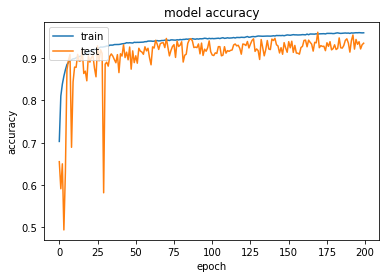

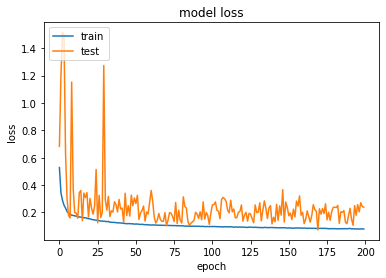

11941

In [ ]:
from sklearn import metrics
scores = model.evaluate(X_test, Y_test)
# classification report
probabilities = model.predict(X_test)
predictions = [float(x.round()) for x in probabilities]
cr = metrics.classification_report(Y_test,predictions)
print(cr)
# saving deep learning model
model_json = model.to_json()
with open("model_bh.json", "w") as json_file:
  json_file.write(model_json)
model.save_weights("model_bh.h5")
print("Saved model to disk")
# training accuracy
print(history.history.keys()) 
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# training loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
import gc
gc.collect()